In [6]:
import numpy as np
import pandas as pd
# from pandas.stats.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from math import log
from sklearn.linear_model import LinearRegression
import requests

from scipy import stats
from scipy.stats import t

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# import statsmodels.api as sm

In [7]:
def getData(stockName, start, end):
    # stock = yf.Ticker(stockName)
    # hist = stock.history(start=start, end=end)
    df = yf.download(stockName, start=start, end=end)
    return df

# famaFrench = pd.read_csv("famaFrench.csv")

start = "2010-01-01"
end = "2015-01-01"
benchmark = getData("KBE", start, end)
individual = getData("GOOGL", start, end)
# MSFT = getData("MSFT", start, end)
# GOOGL = getData("GOOGL", start, end)
# AMZN = getData("AMZN", start, end)
# TSLA = getData("TSLA", start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
individual_adjClose = individual.loc[:, "Adj Close"]
benchmark_adjClose = benchmark.loc[:, "Adj Close"]

individual_logReturns = np.array([log(individual_adjClose[t]/individual_adjClose[t-1]) for t in range(1,len(individual_adjClose))])
benchmark_logReturns = np.array(
    [log(benchmark_adjClose[t]/benchmark_adjClose[t-1]) for t in range(1, len(benchmark_adjClose))])


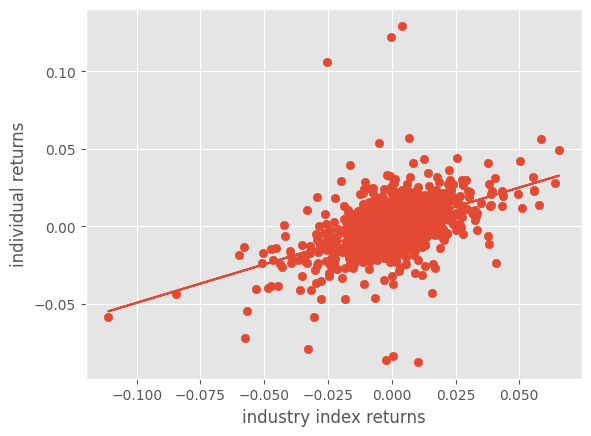

alpha: 0.0002166489 
beta: 0.4954755610
intercept (95%): 0.000217 +/- 0.000753
std error: 0.0003840315082200791
t-value: 0.564143570066915
pvalue = 0.5727571478


In [9]:
lm = np.polyfit(benchmark_logReturns, individual_logReturns, 1)
# X = benchmark_logReturns
# y = individual_logReturns

# model = LinearRegression()
# model.fit(X, y)

plt.style.use("ggplot")
plt.scatter(benchmark_logReturns, individual_logReturns)
plt.plot(benchmark_logReturns, lm[1] + lm[0]*benchmark_logReturns)
plt.ylabel("individual returns")
plt.xlabel("industry index returns")
plt.show()

# X = benchmark_logReturns
# y = individual_logReturns
# X2 = sm.add_constant(X)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())

# sns.regplot(x=benchmark_logReturns, y=individual_logReturns)
print(f"alpha: {lm[1]:.10f} \nbeta: {lm[0]:.10f}")

res = stats.linregress(benchmark_logReturns, individual_logReturns)
def tinv(p, df): return abs(t.ppf(p/2, df))

ts = tinv(0.05, len(benchmark_logReturns)-2)
# print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
# slope (95%): 1.453392 +/- 0.743465
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts*res.intercept_stderr:.6f}")
print(f"std error: {res.intercept_stderr}")
# print(f"95% t-value: {ts}")
print(f"t-value: {res.intercept/res.intercept_stderr}")
pval = stats.t.sf(np.abs(res.intercept/res.intercept_stderr),
                  len(benchmark_logReturns)-1) * 2  # two-sided pvalue = Prob(abs(t)>tt)
print(f'pvalue = {pval:0.10f}')
# t-statistic = 0.391 pvalue = 0.6955


JSONDecodeError: Expecting value: line 1 column 1 (char 0)